# <center> Image Classification
Referencia: https://medium.com/@swapp19902/image-classifier-using-fastai-and-google-colab-87dfc4e90e63

In [1]:
import torch
import fastai
from fastai import *
from fastai.vision import *

# Activate GPU:
### Entorno de ejecución -> Cambiar tipo de entorno de ejecución -> Acelerador por harware: GPU


In [2]:
print("Pytorch version:", torch.__version__)
print("Fast.ai version:", fastai.__version__)
print("")
print("GPU available:", torch.cuda.is_available())
print("GPU name:     ", torch.cuda.get_device_name(0))

Pytorch version: 1.3.1
Fast.ai version: 1.0.60

GPU available: False


# Get dog images

In [3]:
path = URLs.IMAGEWOOF_160 # URLs.DOGS, URLs.MNIST_SAMPLE
source = untar_data(path)
source

PosixPath('/Users/javi/.fastai/data/imagewoof2-160')

# Fast.ai: Load data

In [5]:
data = ImageDataBunch.from_folder(source,                   # Dataset folder
                                  train="train", valid="val",
                                  ds_tfms=get_transforms(), # Data augmentation
                                  size=160,                 # Img size (160x160)
                                  bs=32)                    # Batch size=32

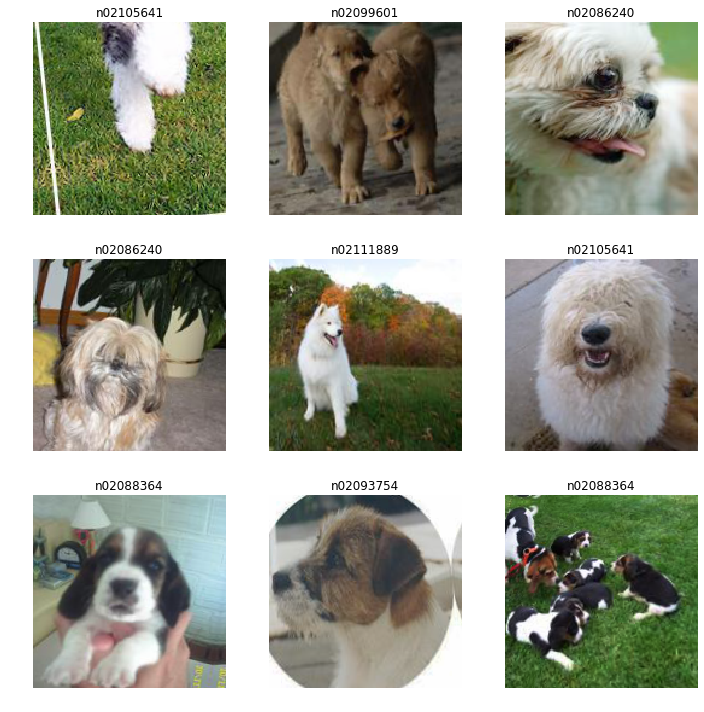

In [6]:
data.show_batch(rows=3, figsize=(10,10))

# Fasta.ai: Create CNN
Choose a CNN:
- **resnet34**: Most used
- **resnet50**: Better, but more computation

In [7]:
learner = cnn_learner(data, models.resnet34, metrics=error_rate)

# [OPTIONAL] Find optimal learning rate

In [8]:
#learner.lr_find()
#learner.recorder.plot(suggestion = True)

# Fast.ai: Train last layer 3 epochs

In [ ]:
learner.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time


In [ ]:
learner.save('stage-1')

# Fast.ai: Train all layers 3 epochs

In [ ]:
learner.unfreeze()
learner.fit_one_cycle(3)

In [ ]:
learner.save('stage-2')

# Results

In [ ]:
interp = ClassificationInterpretation.from_learner(learner)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)